# Example: Poisson point patterns

In this example we will reproduce the volume fraction variance for Poisson point patterns using the Fourier transform method introduced in Ref. [1]. The relevant functions are defined in the main script file, which we import below.

[1]: D. J. Durian, *Hyperuniformity Disorder Length Spectroscopy for Extended Particles*, Phys. Rev. E 96, 032910 (2017) [preprint at: [arXiv:1707.01524](https://arxiv.org/abs/1707.01524)]

In [1]:
from volvar_fourier import *
import matplotlib.pyplot as pl
import numpy as np

Let's reproduce some of the results in Fig. 2 of Ref. [1]. First we generate Poisson point patterns with fixed particle densities. We follow the reference in choosing an image size of 3000x3000 pixels.

- For particles of side length 30, we reach a density of 0.02 by including 200 particles, because density = (number of particles) * (area of particle) / (image size), so 200*900/9000000 = 0.02.
- Similarly, for particles of side length 100, we reach a density of 0.02 by including 18 particles. 

In [2]:
p030 = poisson_point_pattern(num_particles=200,dims=(3000,3000),side=30 )
p100 = poisson_point_pattern(num_particles=18, dims=(3000,3000),side=100)

We now calculate the volume fraction variance as a function of window size for each pattern. This may take a couple of minutes.

In [3]:
window_sizes = list(np.arange(1,20)) + list(np.arange(20,200,10)) + list(np.arange(200,1001,100))
v030 = volume_fraction_variance(image=p030,max_scale=0.33,window_sizes=window_sizes)
v100 = volume_fraction_variance(image=p100,max_scale=0.33,window_sizes=window_sizes)

Now let's plot the results.

[]

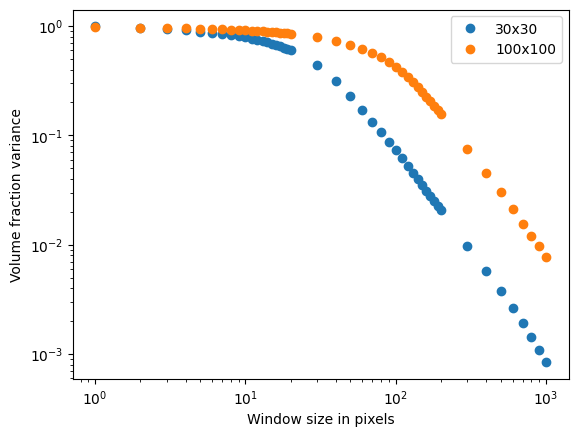

In [4]:
pl.plot(v030[0],v030[1]/0.02,'o',label='30x30')
pl.plot(v100[0],v100[1]/0.02,'o',label='100x100')
pl.xlabel('Window size in pixels')
pl.ylabel('Volume fraction variance')
pl.legend()
pl.loglog()

The above should be compared with the topmost two curves in Fig. 2 of Ref. [1]. If all goes well, for large enough windows our example should reproduce the characteristic behavior of the (normalized) volume fraction variance for Poisson point patterns, which is 1/(window size). We note that here we only calculate the volume fraction variance of a single realization of each Poisson point pattern, whereas Ref. [1] presents an average over many realizations. Nevertheless, the patterns are sufficiently large so that they self-average, and any deviations between our results and those in Ref. [1] should be minor.